In [1]:
import pandas as pd

import os

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF

from IPython.display import clear_output

In [2]:
def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig('analysis/{}.png'.format(fig_id), format='png', dpi=300)

In [10]:
df_metrics_values = pd.read_csv('analysis/df_metrics_values.csv')

In [3]:
df_metrics_values_rows=[]

In [4]:
#importo il grafo completo
first_graph = nx.read_gpickle('data/graphs/complete_graph.gpickle')

# Prime misure generali
## Numero di nodi e link

In [5]:
n_nodes = first_graph.number_of_nodes()
n_links = first_graph.number_of_edges()
print("Number of nodes:\t{}".format(n_nodes))
print("Number of links:\t{}".format(n_links))
df_metrics_values_rows.append(('Number of nodes',n_nodes))
df_metrics_values_rows.append(('Number of links',n_links))

Number of nodes:	10577
Number of links:	433645


## Grado medio e densità

In [6]:
degrees_dict = dict(first_graph.degree()).values()
degrees_list = list(degrees_dict)
avg_degree = np.mean(degrees_list)
density = nx.density(first_graph)
print('Average degree:\t{}'.format(avg_degree))
print('Density:\t{}'.format(density))
df_metrics_values_rows.append(('Average degree',avg_degree))
df_metrics_values_rows.append(('Density',density))

Average degree:	81.99773092559327
Density:	0.007753189384038698


# Analisi della distribuzione del grado

In [7]:
std_dev =np.std(degrees_list)
median = np.median(degrees_list)
minimum=np.min(degrees_list)
maximum=np.max(degrees_list)
print("Average degree:\t\t{}".format(avg_degree))
print('Standard deviation:\t{}'.format(std_dev))
print('Median:\t\t\t{}'.format(median))
print('Minimum:\t\t{}'.format(minimum))
print('Maximum:\t\t{}'.format(maximum))
df_metrics_values_rows.append(('Degree standard deviation',std_dev))
df_metrics_values_rows.append(('Median degree',median))
df_metrics_values_rows.append(('Minimum degree',minimum))
df_metrics_values_rows.append(('Maximum degree',maximum))

Average degree:		81.99773092559327
Standard deviation:	59.51118518004599
Median:			77.0
Minimum:		1
Maximum:		554


## ECDF - loglog scale

Saving figure ecdf
Saving figure eccdf


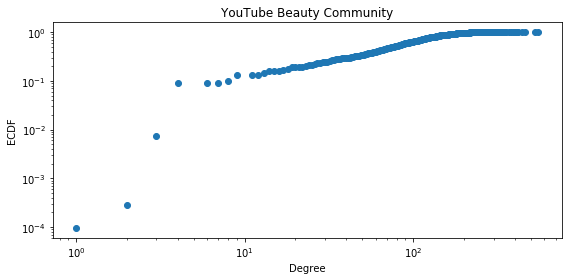

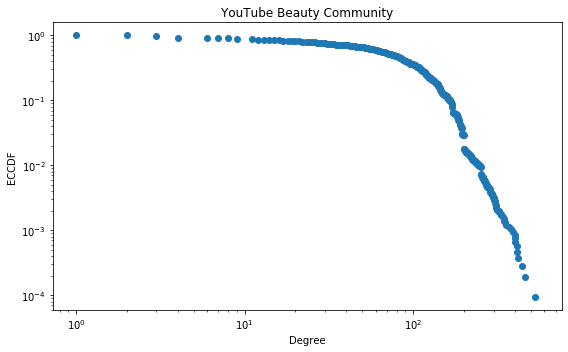

In [8]:
ecdf = ECDF(degrees_list)
x = np.unique(degrees_list)

y = ecdf(x)
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_ylabel('ECDF')
axes.set_xlabel('Degree')
plt.title('YouTube Beauty Community')

save_fig('ecdf')

y = 1-ecdf(x)
fig_ccdf_function = plt.figure(figsize=(8,5))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Degree')
axes.set_ylabel('ECCDF')
plt.title('YouTube Beauty Community')

save_fig('eccdf')

## Confronto con rete equivalente E-R

In [9]:
p = density

### Faccio la media di più reti random

In [10]:
er_avgs = []
er_stds = []
er_medians = []
er_mins = []
er_maxs = []

In [11]:
for i in range(10):
    print('{}/10'.format(i))
    clear_output(wait=True)
    random_graph = nx.fast_gnp_random_graph(n_nodes,p)
    er_degrees_dict = dict(random_graph.degree()).values()
    er_degrees_list = list(er_degrees_dict)
    er_avgs.append(np.mean(er_degrees_list))
    er_stds.append(np.std(er_degrees_list))
    er_medians.append(np.median(er_degrees_list))
    er_mins.append(np.min(er_degrees_list))
    er_maxs.append(np.max(er_degrees_list))

9/10


In [12]:
er_n_nodes = random_graph.number_of_nodes()
er_n_links = random_graph.number_of_edges()

pd_rows=[]

er_avg_degree = np.mean(er_avgs)
er_density = nx.density(random_graph)
er_std_dev = np.mean(er_stds)
er_median = np.mean(er_medians)
er_minimum = np.mean(er_mins)
er_maximum = np.mean(er_maxs)
pd_rows.append(('Number of nodes',n_nodes,er_n_nodes))
pd_rows.append(('Number of links',n_links,er_n_links))
pd_rows.append(('Density',density,er_density))
pd_rows.append(('Average degree',avg_degree,er_avg_degree))
pd_rows.append(('Degree standard deviation',std_dev,er_std_dev))
pd_rows.append(('Median degree',median,er_median))
pd_rows.append(('Minimum degree',minimum,er_minimum))
pd_rows.append(('Maximum degree',maximum,er_maximum))

df_real_er_comparison = pd.DataFrame(pd_rows, columns=['Metric name','Real network','Random network'])
df_real_er_comparison.to_csv('analysis/df_real_er_comparison.csv')
print('NETWORKS COMPARISON')
print(df_real_er_comparison)

NETWORKS COMPARISON
                 Metric name   Real network  Random network
0            Number of nodes   10577.000000    10577.000000
1            Number of links  433645.000000   433179.000000
2                    Density       0.007753        0.007745
3             Average degree      81.997731       81.986480
4  Degree standard deviation      59.511185        9.015859
5              Median degree      77.000000       82.000000
6             Minimum degree       1.000000       50.000000
7             Maximum degree     554.000000      119.300000


                 Metric name   Real network  Random network
0            Number of nodes   10577.000000    10577.000000
1            Number of links  433645.000000   433273.000000
2                    Density       0.007753        0.007747
3             Average degree      81.997731       81.927390
4  Degree standard deviation      59.511185        8.942032
5              Median degree      77.000000       82.000000
6             Minimum degree       1.000000       50.000000
7             Maximum degree     554.000000      122.000000
Saving figure YouTube Beauty Community vs Erdos-Renyi


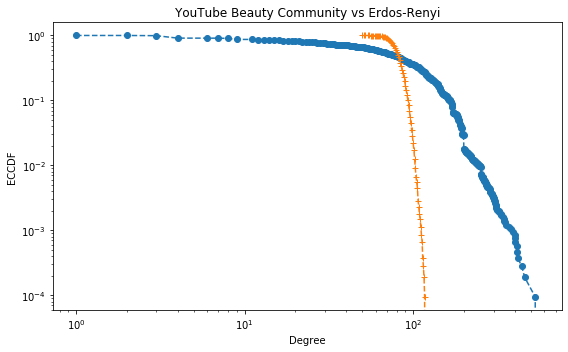

In [13]:
pd_rows=[]

random_graph = nx.fast_gnp_random_graph(n_nodes,p)
er_n_nodes = random_graph.number_of_nodes()
er_n_links = random_graph.number_of_edges()
er_degrees_dict = dict(random_graph.degree()).values()
er_degrees_list = list(er_degrees_dict)
er_avg_degree = np.mean(er_degrees_list)
er_density = nx.density(random_graph)
er_std_dev = np.std(er_degrees_list)
er_median = np.median(er_degrees_list)
er_minimum = np.min(er_degrees_list)
er_maximum = np.max(er_degrees_list)
pd_rows.append(('Number of nodes',n_nodes,er_n_nodes))
pd_rows.append(('Number of links',n_links,er_n_links))
pd_rows.append(('Density',density,er_density))
pd_rows.append(('Average degree',avg_degree,er_avg_degree))
pd_rows.append(('Degree standard deviation',std_dev,er_std_dev))
pd_rows.append(('Median degree',median,er_median))
pd_rows.append(('Minimum degree',minimum,er_minimum))
pd_rows.append(('Maximum degree',maximum,er_maximum))

df = pd.DataFrame(pd_rows, columns=['Metric name','Real network','Random network'])
df.to_csv('analysis/df_real_er_comparison_one.csv')
print(df)

ecdf = ECDF(degrees_list)
x = np.unique(degrees_list)
y = 1-ecdf(x)
er_ecdf = ECDF(er_degrees_list)
er_x = np.unique(er_degrees_list)
er_y = 1-er_ecdf(er_x)

fig_ecdf_youtube = plt.figure(figsize=(8,5))
axes = fig_ecdf_youtube.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='--')
axes.loglog(er_x,er_y,marker = '+', ms = 6, linestyle='--')
axes.set_xlabel('Degree')
axes.set_ylabel('ECCDF')
plt.title('YouTube Beauty Community vs Erdos-Renyi')

save_fig('YouTube Beauty Community vs Erdos-Renyi')

# Hubs

In [16]:
percentile_99 = np.percentile(degrees_list,99)
percentile_95 = np.percentile(degrees_list,95)
print("Percentile 99:{}".format(percentile_99))
print("Percentile 95:{}".format(percentile_95))
df_metrics_values_rows.append(('Percentile 99',percentile_99))

Percentile 99:246.0
Percentile 95:185.0


In [20]:
hub_nodi = [k for k,v in dict(first_graph.degree()).items() if v>= percentile_99]
print(hub_nodi)
df_metrics_values_rows.append(('Number of hubs',len(hub_nodi)))

['RawBeautyKristi', 'giusep flauding', 'Moa Fafe', 'Amber Freitag', 'Zumer Kadri', 'Azaleah Bumpus-Barnett', 'lilita p', 'kiley.elizabeth', 'Zinnia Hardy', 'MsCrystalclear23', 'Spirit Within Apothecary', 'Symphani Soto', 'Andrea Hudíková', 'gigi_ c', 'Ronni Steinwand', 'Ilce Geovanna Salinas Morales', 'Erika Yuen', 'Haylee Lorton', 'Jordan Fields', 'Nicole Smith', 'Ishie Boom boom', 'Teaira Walker', 'Dinar Singer', 'Nancy Rodriguez', 'Yo ItsNikkiB', 'Alex Green', 'Jane Ward', 'Leelou Iehl', 'Girl Trucker', 'Olivia Miranda', 'Im_a_prø_at_Imperfectiøn', 'Nyssa Mö', 'Raechell Mitchell', 'Keri Rhinehart', 'Rol fems', 'Venetra Roberson', 'Michelle', 'Dee Luther', 'Cindy', 'MisticSelene🌙', 'TRUE-TALK Treasure', 'Sarah', 'Jessica Munoz', 'galaxy wolves', 'PatrickStarrr', 'Grace', 'Laura Lee', 'Zoe', 'D L', 'Bluelilly40', 'Lucy T', 'Kay The MilkShake', 'Jennifer Alva', 'Selina Li Beauty', 'luisjana nerhati', 'K M', 'Rebecca S', 'Relle Tolentino', 'SydneyLoves Makeup', 'Lauren Tokunaga', 'Natal

In [18]:
np.save('analysis/hubs.npy',hub_nodi)

# Isolates

In [21]:
isolates = list(nx.isolates(first_graph))
print(isolates)
np.save('analysis/isolates.npy',isolates)
df_metrics_values_rows.append(('Number of isolates',len(isolates)))

[]


# Connettività

In [23]:
print("The network is {}.".format("connected" if nx.is_connected(first_graph) else "not connected"))
n_components = nx.number_connected_components(first_graph)
print("There are {} components.".format(n_components))
df_metrics_values_rows.append(('Number of connected components',n_components))

The network is not connected.
There are 80 components.


In [29]:
connected_components = []
for component in nx.connected_components(first_graph):
    connected_components.append(component)
np.save('analysis/connected_components.npy',connected_components)

## Distribuzione della size delle componenti connesse

Saving figure Connected component size distribution


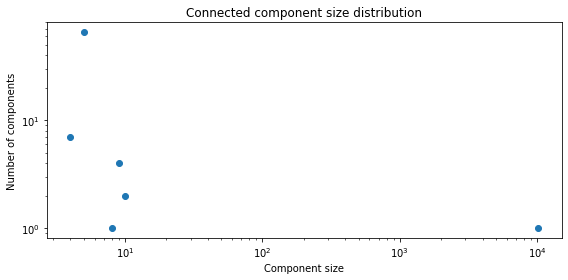

In [51]:
x = np.unique([len(c) for c in connected_components])

y = []
counter=0
for sz in x:
    for c in connected_components:
        if len(c) == sz:
            counter+=1
    y.append(counter)
    counter = 0
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Component size')
axes.set_ylabel('Number of components')
plt.title('Connected component size distribution')

save_fig('Connected component size distribution')

Saving figure ECDF Connected component size distribution


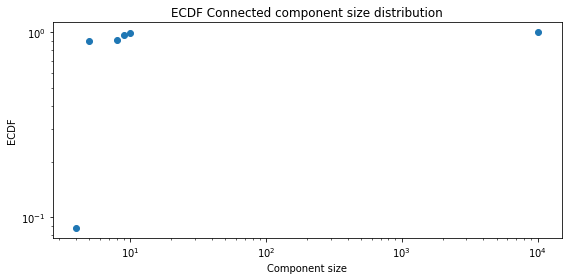

In [71]:
ecdf = ECDF([len(c) for c in connected_components])
x = np.unique([len(c) for c in connected_components])
y = ecdf(x)
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Component size')
axes.set_ylabel('ECDF')
plt.title('ECDF Connected component size distribution')

save_fig('ECDF Connected component size distribution')

# Transitività

In [38]:
avg_clustering_coeff = nx.average_clustering(first_graph)
df_metrics_values_rows.append(('Average local clustering coefficient',avg_clustering_coeff))

In [40]:
transitivity = nx.transitivity(first_graph)
df_metrics_values_rows.append(("Transitivity (global clustering)",avg_clustering_coeff))

In [41]:
clustering=nx.clustering(first_graph)
np.save('analysis/clustering.npy',clustering)

In [42]:
print('Transitivity (global clustering):{}'.format(transitivity))
print('Average local clustering coefficient:{}'.format(avg_clustering_coeff))
print('Local clustering:{}'.format(clustering))

Transitivity (global clustering):0.7112099913705435
Average local clustering coefficient:0.8076300520656075
Local clustering:{'Z': 0.6295081967213115, 'Alexis Leon': 0.9089554260940252, 'Valerie Konzeoue': 0.5399484536082474, 'Karima Rustin': 1.0, 'Journey Kopka': 0.7282608695652174, 'beauty devine': 0.7221807318894697, 'Certified Weenie': 1.0, 'Jenny Lux': 1.0, 'Josiah X': 1.0, 'RawBeautyKristi': 0.33332408589025136, 'Stephanie Rubino': 0.6941223510595762, 'Sam Fazal ali Hussian': 0.591075591075591, 'TL Wagener': 0.6014492753623188, 'Autumn Daniels': 0.8226600985221675, 'Ive Chang': 0.5543672014260249, 'Cheese Supreme': 0.9572795625427204, 'K N': 1.0, 'Emily Rose': 1.0, 'Chris Caldwell': 0.40085025980160605, 'drcoxhugenews': 0.7486772486772487, 'Toni': 0.8555180602424697, 'JAGS': 0.7947530864197531, 'Anna Koren': 0.648936170212766, 'maggie burns': 0.8652903225806452, 'Tiffany Christian': 0.7252747252747253, 'Don Alpaccio': 0.6160794941282746, 'Alondra Chavez': 0.6559734513274337, 'Min

In [49]:
local_clustering_dev_std = np.std(list(clustering.values()))
local_clustering_min = np.min(list(clustering.values()))
local_clustering_max = np.max(list(clustering.values()))
local_clustering_mean = np.mean(list(clustering.values()))
local_clustering_median = np.median(list(clustering.values()))
df_metrics_values_rows.append(("Average local clustering (mediated)",local_clustering_mean))
df_metrics_values_rows.append(("Local clustering standard deviation (mediated)",local_clustering_dev_std))
df_metrics_values_rows.append(("Median local clustering (mediated)",local_clustering_median))
df_metrics_values_rows.append(("Minimum local clustering (mediated)",local_clustering_min))
df_metrics_values_rows.append(("Maximum local clustering (mediated)",local_clustering_max))
print("Average local clustering (mediated):\t\t{}".format(local_clustering_mean))
print('Local clustering standard deviation (mediated):\t{}'.format(local_clustering_dev_std))
print('Median local clustering (mediated):\t\t{}'.format(local_clustering_median))
print('Minimum local clustering (mediated):\t\t{}'.format(local_clustering_min))
print('Maximum local clustering (mediated):\t\t{}'.format(local_clustering_max))

Average local clustering (mediated):		0.8076300520656062
Local clustering standard deviation (mediated):	0.17166259345599438
Median local clustering (mediated):		0.8221343873517787
Minimum local clustering (mediated):		0.0
Maximum local clustering (mediated):		1.0


Saving figure Local clustering coefficient distribution


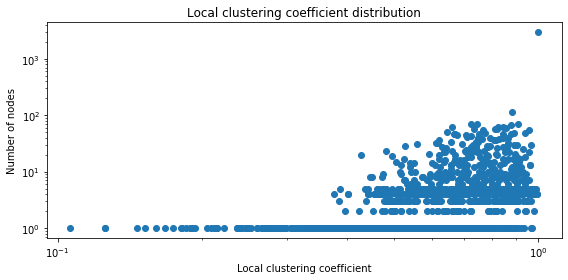

In [54]:
x = np.unique([item for item in list(clustering.values())])

y = []
counter=0
for sz in x:
    for item in list(clustering.values()):
        if item == sz:
            counter+=1
    y.append(counter)
    counter = 0
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Local clustering coefficient')
axes.set_ylabel('Number of nodes')
plt.title('Local clustering coefficient distribution')

save_fig('Local clustering coefficient distribution')

Saving figure ECDF Local clustering coefficient distribution


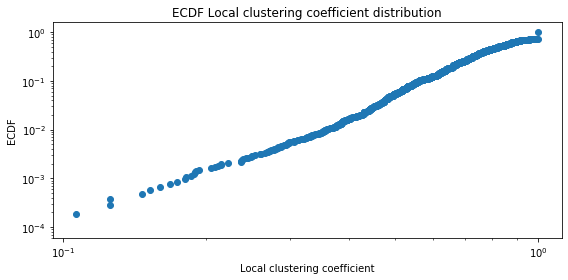

In [72]:
ecdf = ECDF(list(clustering.values()))
x = np.unique(list(clustering.values()))
y = ecdf(x)
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Local clustering coefficient')
axes.set_ylabel('ECDF')
plt.title('ECDF Local clustering coefficient distribution')

save_fig('ECDF Local clustering coefficient distribution')

# Assortativity

In [56]:
degree_assortativity = nx.degree_assortativity_coefficient(first_graph)
df_metrics_values_rows.append(("Degree assortativity",degree_assortativity))

In [57]:
print("Degree assortativity:{}".format(degree_assortativity))

Degree assortativity:0.26839891391475934


In [58]:
nodes_attributes = []
for n in first_graph.nodes().values():
    nodes_attributes = list(n.keys())
    break

In [60]:
assortativity_coefficients = []
for idx, attr in enumerate(nodes_attributes):
    print('{}/{}'.format(idx,len(nodes_attributes)))
    clear_output(wait=True)
    assortativity_coefficients.append((attr,nx.attribute_assortativity_coefficient(first_graph,attr)))
np.save('analysis/assortativity_coefficients.npy',assortativity_coefficients)

237/238


In [61]:
assortativity_coefficients

[('Laura Lee', 0.9163342489461104),
 ('sleek', 0.09649134297992004),
 ('kat von d', 0.1925075087614928),
 ('butter london', 0.3107637114895758),
 ('estã©e lauder', 0.11219806516650309),
 ('trixie cosmetics', 0.024637376646801476),
 ('iluvsarahii', 0.8516123189271687),
 ('social media', 0.15033645641454232),
 ('Carli Bybel', 0.8329473594046615),
 ('wander beauty', 0.3057805177205989),
 ('Bretman Rock', 0.9769974938202167),
 ('lit cosmetics', 0.18263542457527418),
 ('cheap', 0.04708297190137246),
 ('sk-ii', 0.05203806401246197),
 ('armani', 0.17849642896197085),
 ('coppertone', 0.21269491914360777),
 ('Teaira Walker', 0.769210586955997),
 ('Katy', 0.798646969984824),
 ('benefit cosmetics', 0.4211278275759658),
 ('chanel', 0.13223167571610653),
 ('RawBeautyKristi', 0.8695825271375516),
 ('chi chi cosmetics', 0.05696662628957971),
 ('Zabrena', 0.7055823371755626),
 ('video_game_culture', 0.2297682991373561),
 ('bondi sands', 0.07604409739881436),
 ('Sazan Hendrix', 0.9482750596655088),
 ('

In [62]:
arr_assortativity_coefficients = [item[1] for item in assortativity_coefficients]
assortativity_dev_std = np.std(arr_assortativity_coefficients)
assortativity_min = np.min(arr_assortativity_coefficients)
assortativity_max = np.max(arr_assortativity_coefficients)
assortativity_mean = np.mean(arr_assortativity_coefficients)
assortativity_median = np.median(arr_assortativity_coefficients)
df_metrics_values_rows.append(("Average assortativity cofficient",assortativity_mean))
df_metrics_values_rows.append(("Assortativity cofficient standard deviation",assortativity_dev_std))
df_metrics_values_rows.append(("Median assortativity cofficient",assortativity_median))
df_metrics_values_rows.append(("Minimum assortativity cofficient",assortativity_min))
df_metrics_values_rows.append(("Maximum assortativity cofficient",assortativity_max))
print("Average assortativity cofficient:\t\t{}".format(assortativity_mean))
print('Assortativity cofficient standard deviation:\t{}'.format(assortativity_dev_std))
print('Median assortativity cofficient:\t\t{}'.format(assortativity_median))
print('Minimum assortativity cofficient:\t\t{}'.format(local_clustering_min))
print('Maximum assortativity cofficient:\t\t{}'.format(local_clustering_max))

Average assortativity cofficient:		0.39398776435252947
Assortativity cofficient standard deviation:	0.31418567322403623
Median assortativity cofficient:		0.24419116270869107
Minimum assortativity cofficient:		-8.645595496284267e-05
Maximum assortativity cofficient:		0.9769974938202167


Saving figure Assortativity coefficient distribution


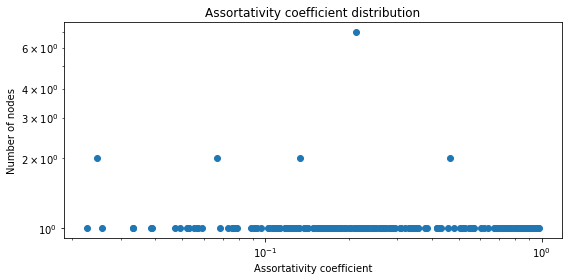

In [63]:
x = np.unique(arr_assortativity_coefficients)

y = []
counter=0
for sz in x:
    for item in arr_assortativity_coefficients:
        if item == sz:
            counter+=1
    y.append(counter)
    counter = 0
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Assortativity coefficient')
axes.set_ylabel('Number of nodes')
plt.title('Assortativity coefficient distribution')

save_fig('Assortativity coefficient distribution')

Saving figure ECDF Assortativity coefficient distribution


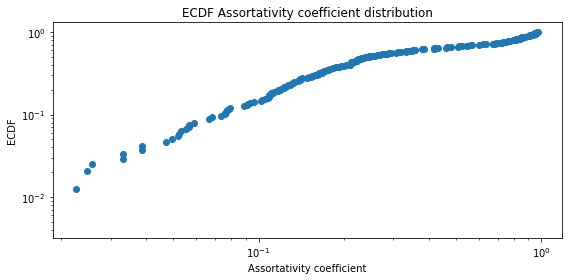

In [73]:
ecdf = ECDF(arr_assortativity_coefficients)
x = np.unique(arr_assortativity_coefficients)
y = ecdf(x)
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Assortativity coefficient')
axes.set_ylabel('ECDF')
plt.title('ECDF Assortativity coefficient distribution')

save_fig('ECDF Assortativity coefficient distribution')

# Saving lines

In [65]:
df_metrics_values = pd.DataFrame(df_metrics_values_rows, columns=['Metric name','Value'])
df_metrics_values.to_csv('analysis/df_metrics_values.csv')

In [66]:
df_metrics_values

,Metric name,Value
0,Number of nodes,10577.000000
1,Number of links,433645.000000
2,Average degree,81.997731
3,Density,0.007753
4,Degree standard deviation,59.511185
5,Median degree,77.000000
6,Minimum degree,1.000000
7,Maximum degree,554.000000
8,Percentile 99,246.000000
9,Number of hubs,107.000000
